# **Data Science and Business Analytics (The Sparks Foundation June 21)**

Task 1 : Predict Using Supervised ML

Author : Sakshi Umrani

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied

# Importing Libraries

In [4]:
# Importing libraries
import pandas as pd
import numpy as np  

import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split

%matplotlib inline

# Loading Data

In [5]:
# Reading data from the remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

# Load the first 5 records of the data
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Understanding Data

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Count the number of rows and columns in the data set
data.shape

(25, 2)

In [9]:
#Count the empty values in each column
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#Look at the data types 
data.dtypes

Hours     float64
Scores      int64
dtype: object

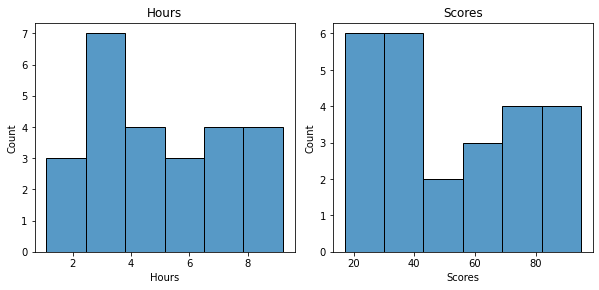

In [21]:
#Visualize this count
plt.figure(figsize=(25, 15))

for i, column in enumerate(data.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Correlation

In [22]:
#Get the correlation of the columns
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


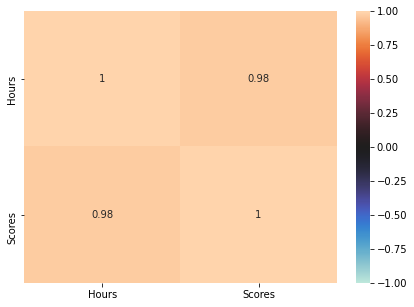

In [23]:
# Visualize the correlation by creating a heat map.
plt.figure(figsize=(7,5))  
sns.heatmap(data.corr(),
            vmin=-1,
            vmax = 1,
            center = 0,
            annot = True)
plt.show()

Since the value of correlation value is positive, it is a positive correaltion

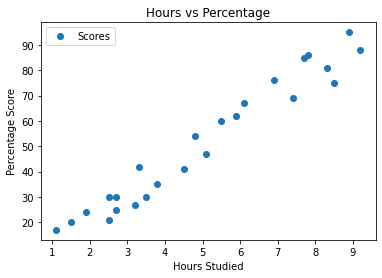

In [11]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Data Processing

In [24]:
# splitting the data set into independent dataset (feature dataset) : x and dependent dataset (target dataset) : y
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)


# Training the Model

Linear Regression

In [26]:
linear = LinearRegression()  
linear.fit(X_train, y_train) 

print("Training complete.")

Training complete.


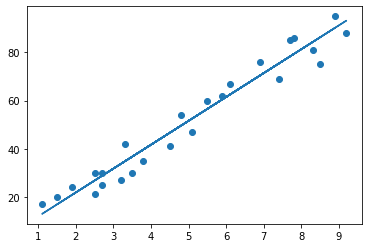

In [27]:
# Plotting the regression line
line = linear.coef_*x+linear.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Predicting values for test data

In [28]:
print(X_test) # Testing data - In Hours
y_pred = linear.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Accuracy

In [31]:
print("Model Accuracy: ", linear.score(x, y))

Model Accuracy:  0.9526947647057273


In [ ]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002982


# Answering the Question

In [30]:
# Testing Data
hours = 9.25
own_pred = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
